In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import os
import glob

from multiprocessing import Pool

%matplotlib inline

In [2]:
files = glob.glob("/scratch/04101/vvenu/sparsity/epi/eval/affs/*")
files += glob.glob("/scratch/04101/vvenu/sparsity/epi/eval/lsds/*")

In [3]:
len(files)

19200

In [4]:
def read_json(file):
    
    index = os.path.basename(file).split(".")[0]
    
    with open(file,"r") as f:
        try:
            result = json.load(f)
        except:
            result = None
    
    return result

In [5]:
def read_all(files):
    
    results = []
    
    with Pool() as pool:
        
        for i,result in enumerate(pool.imap_unordered(read_json,files)):
            if i % 100000 == 0:
                print(i)
            results.append(result)
        
    return results

In [6]:
tets = read_json(files[-1])

In [7]:
tets

{'raw_file': '/scratch/04101/vvenu/sparsity/epi/data/crop_N_511_final_crop_ds2.zarr',
 'labels_dataset': 'labels',
 'labels_mask': None,
 'pred_file': '/scratch/04101/vvenu/sparsity/epi/affs_nets/lsds/A/2d_crop_N_511_final_crop_ds2.zarr',
 'pred_dataset': 'lsd/obj_050/rep_2/3d_affs_20000_from_stacked_lsds_10000',
 'roi': [[2350, 11250, 7500], [4700, 37500, 37500]],
 'downsampling': None,
 'denoising': ['tv', 0.01, 0],
 'normalize_preds': False,
 'background_mask': False,
 'min_seed_distance': 10,
 'merge_function': 'hist_quant_50',
 'frags': {'rand_split': 0.04150442930528881,
  'rand_merge': 0.8778662942441685,
  'voi_split': 4.820397239017964,
  'voi_merge': 0.5060686861617931,
  'nvi_split': 0.3981763169832935,
  'nvi_merge': 0.04180248133191789,
  'nid': 0.41554722197232175,
  'merge_threshold': None,
  'voi_sum': 5.3264659251797575,
  'nvi_sum': 0.43997879831521136},
 'best': {'rand_split': 0.8508970746894005,
  'rand_merge': 0.7537476415825759,
  'voi_split': 0.7274704819927198,


In [8]:
results = read_all(files)

0


In [9]:
#convert to plottable values
for x in results:
    
#     if x is None: 
#         results.remove(x)
#         continue
    
    for item in x:
    
        if x[item] == None: x[item] = 0
        if x[item] == False: x[item] = 0
        if x[item] == True: x[item] = 1
        if type(x[item]) == list: x[item] = str(x[item])
        
        if type(x[item]) == dict:
            for it in x[item]:
      
                if x[item][it] == None: x[item][it] = 0
                if x[item][it] == False: x[item][it] = 0
                if x[item][it] == True: x[item][it] = 1
                if type(x[item][it]) == list: x[item][it] = str(x[item[it]])

In [10]:
best_results = [x for x in results if (False not in [x['best'][y] < x['frags'][y] for y in ['voi_sum','nvi_sum','nid']])] 

In [11]:
for x in best_results:
    for y in x['best']:
        x[y] = x['best'][y]
    del x['best']
    del x['frags']

In [12]:
len(best_results)

19200

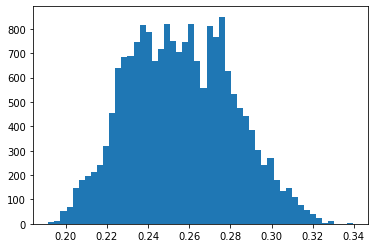

In [13]:
plt.hist([x['nvi_sum'] for x in best_results], bins=50);

In [14]:
len(best_results)

19200

In [15]:
best_results = sorted(best_results, key=lambda x: x["nvi_sum"])

In [16]:
for x in best_results:

    x['pred_iteration'] = int(x['pred_dataset'].split('_')[-1])
    x['affs_iteration'] = int(x['pred_dataset'].split('_')[-5])
    
#     if '0gb' in x['pred_file']:
#         x['gb'] = 0
#     if '1gb' in x['pred_file']:
#         x['gb'] = 1
#     if '2gb' in x['pred_file']:
#         x['gb'] = 2
    x['gb'] = 1
    
#     if 'arlo' in x['pred_file']:
#         x['gt_type'] = "arlo"
#     elif 'jan' in x['pred_file']:
#         x['gt_type'] = "jan"
#     else: x['gt_type'] = "voronoi"
    x['gt_type'] = x['pred_file'].split('/')[-2]
        
    x['pred'] = x['pred_dataset'].split('_')[-2]
#     if "lite" in x["pred_file"]:
#         x["net_size"] = "lite"
#     elif "heavy" in x["pred_file"]:
#         x["net_size"] = "heavy"
#     else: x["net_size"] = "mid"

    x['rep'] = x['pred_dataset'].split('/')[2]
    x['sparse_net'] = x['pred_dataset'].split('/')[0]
        
#     x["EA"] = "no" if "noEA" in x['pred_file'] else "yes"
#     x["LR"] = "yes" if "LR" in x['pred_file'] else "no"
#     x["MR"] = "yes" if "MR" in x['pred_file'] else "no"

In [53]:
#plot a selection
results_to_plot = [x for x in best_results \
                     if x['nvi_sum'] < 0.2 \
                   if "1" in x["rep"]
                    #and x["pred"] == "lsds" \
                    #and x["pred_iteration"] == 2500
#                         and "dense" not in x['pred_dataset'] \
# #                        and "disk_1/" not in x['pred_dataset'] \
#                      and "disk_1-obj_002" in x["pred_dataset"]
#                     and x["MR"] == "yes" 
                   
                    #if 'lsds' in x['pred_dataset']
                  ]

len(results_to_plot)

43

In [50]:
results_to_plot[0]

{'raw_file': '/scratch/04101/vvenu/sparsity/epi/data/crop_N_511_final_crop_ds2.zarr',
 'labels_dataset': 'labels',
 'labels_mask': 0,
 'pred_file': '/scratch/04101/vvenu/sparsity/epi/affs_nets/lsds/A/2d_crop_N_511_final_crop_ds2.zarr',
 'pred_dataset': 'mtlsd/obj_050/rep_2/3d_affs_20000_from_stacked_lsds_6000',
 'roi': '[[2350, 11250, 7500], [4700, 37500, 37500]]',
 'downsampling': 0,
 'denoising': "['tv', 0.01, 0]",
 'normalize_preds': 1,
 'background_mask': 0,
 'min_seed_distance': 10,
 'merge_function': 'mean',
 'rand_split': 0.8662773316086742,
 'rand_merge': 0.8180628172476252,
 'voi_split': 0.7186518112667297,
 'voi_merge': 0.8434008421398715,
 'nvi_split': 0.08978162188409675,
 'nvi_merge': 0.10536659661687865,
 'nid': 0.11575968926817437,
 'merge_threshold': 0.4,
 'voi_sum': 1.5620526534066013,
 'nvi_sum': 0.1951482185009754,
 'pred_iteration': 6000,
 'affs_iteration': 20000,
 'gb': 1,
 'gt_type': 'A',
 'pred': 'lsds',
 'rep': 'rep_2',
 'sparse_net': 'mtlsd'}

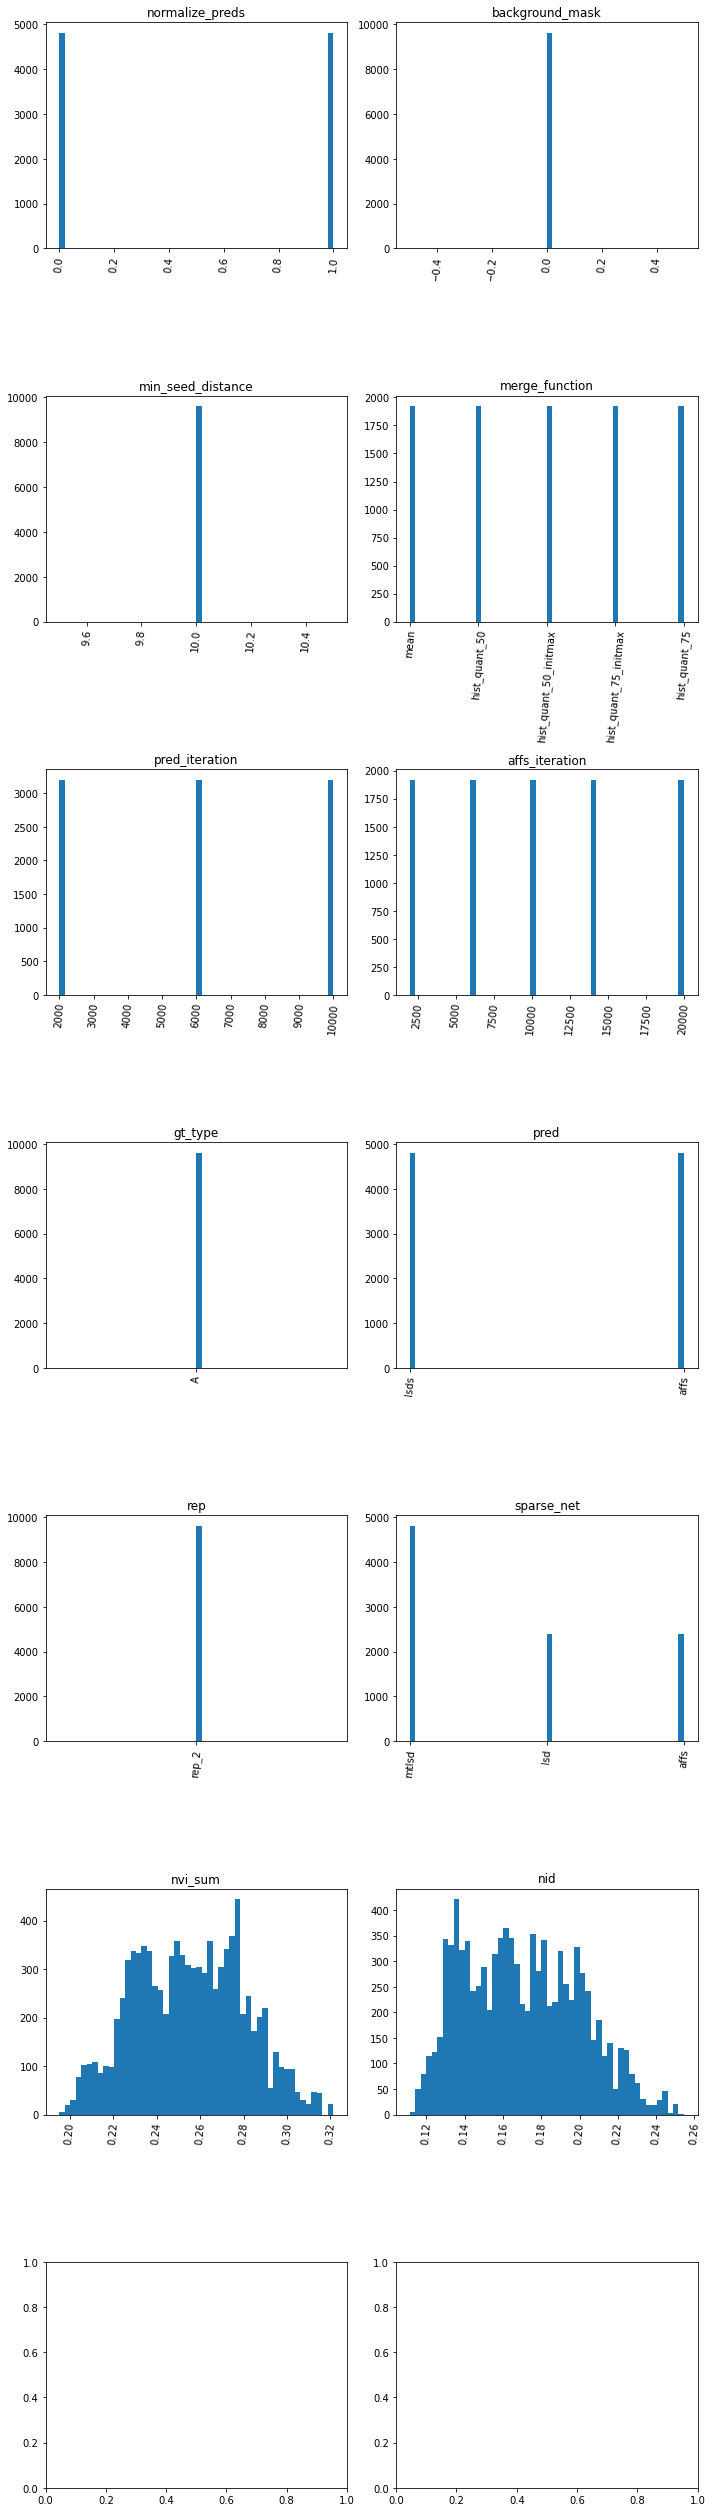

In [51]:
#plot histograms
fig, axes = plt.subplots(7,2,figsize=(10,35),sharex=False,sharey=False,squeeze=False)

row = 0

for plot_num,plot_name in enumerate(
    [
        'normalize_preds',
        'background_mask',
        'min_seed_distance',
        #'MR',
        'merge_function',
        #'gb',
        'pred_iteration',
        'affs_iteration',
        #'net_size',
        'gt_type',
        'pred',
        'rep',
        'sparse_net',
        #'EA',
        #'LR',
        'nvi_sum',
        'nid'
    ]):
    
    data = [x[plot_name] for x in results_to_plot]
    nbins = 50
    
    axes[row][plot_num % 2].hist(data,bins=nbins)
    axes[row][plot_num % 2].set_title(plot_name)
    axes[row][plot_num % 2].tick_params(axis='x', rotation=85)
    
    if plot_num % 2 == 1:
        row += 1
        
plt.tight_layout()